In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve, accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer


# Problem #1

In [44]:
df = pd.read_excel("Election_Data.xlsx",sheet_name ="Election_Dataset_Two Classes").drop("Unnamed: 0", axis = 1)

In [45]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


# EDA

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [47]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [48]:
df.duplicated().sum()

8

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [50]:
df.median()

age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

In [51]:
df.drop_duplicates()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


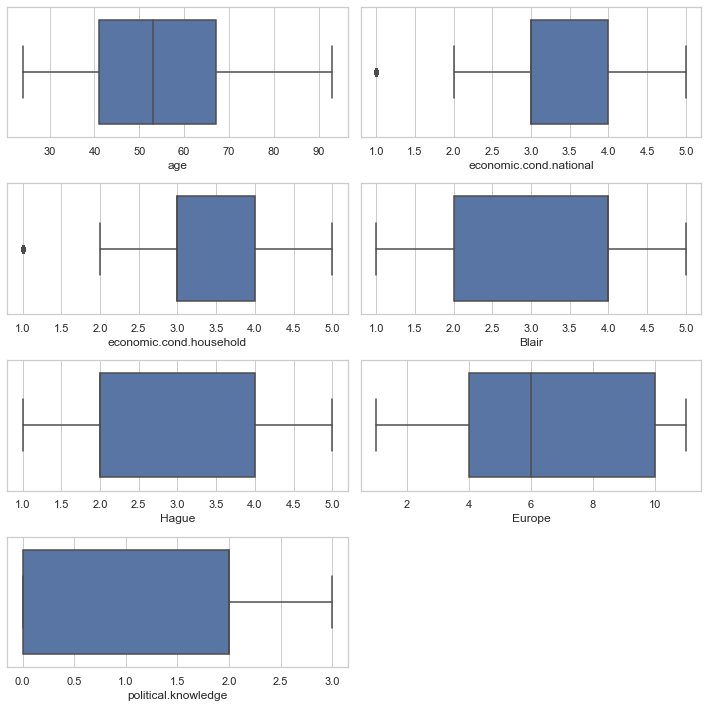

In [52]:
data_plot = df.select_dtypes(include = ["int64"])
fig = plt.figure(figsize = (10, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(4,2, i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

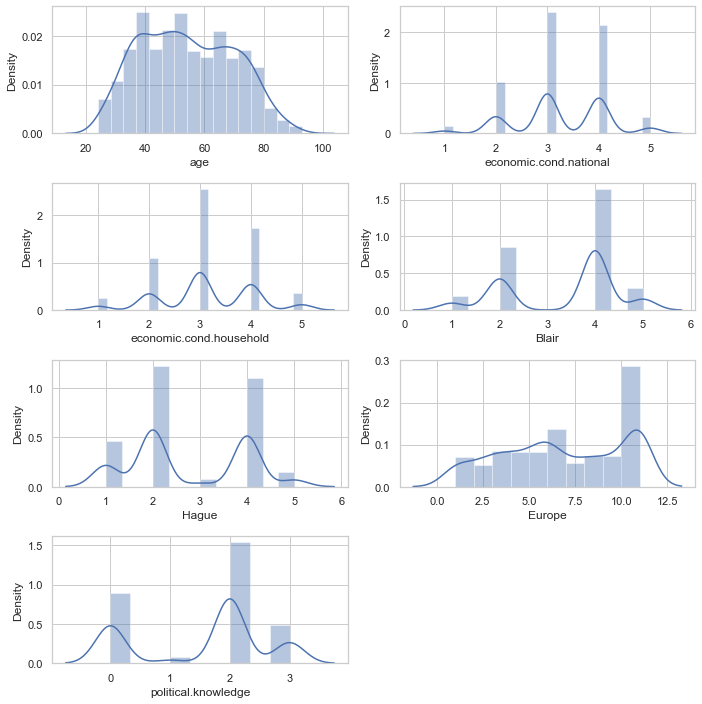

In [53]:
data_plot = df.select_dtypes(include = ["int64"])
fig = plt.figure(figsize = (10, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(4,2, i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [54]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [55]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


In [56]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [57]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [58]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')
        print(df[column].value_counts(normalize = True))
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64


female    0.532459
male      0.467541
Name: gender, dtype: float64




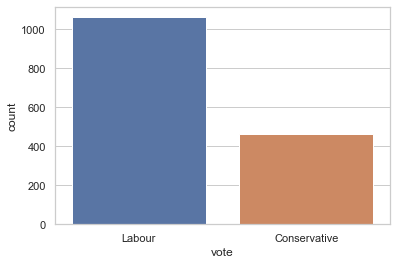

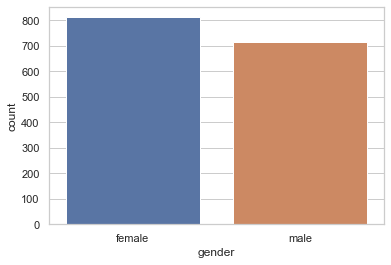

In [59]:
for var in cat:
    sns.countplot(df[var])
    plt.show()

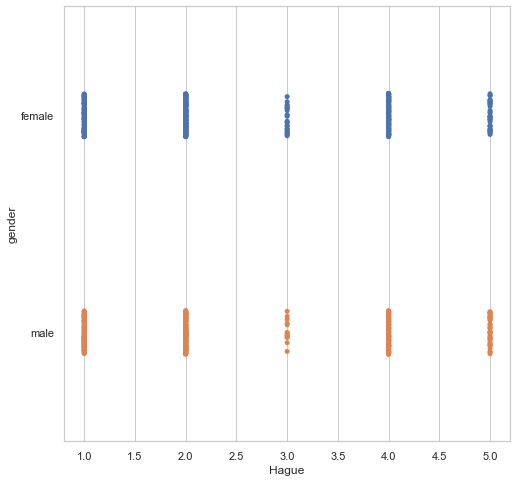

In [60]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Hague"], df['gender'], jitter=True) 
plt.show()

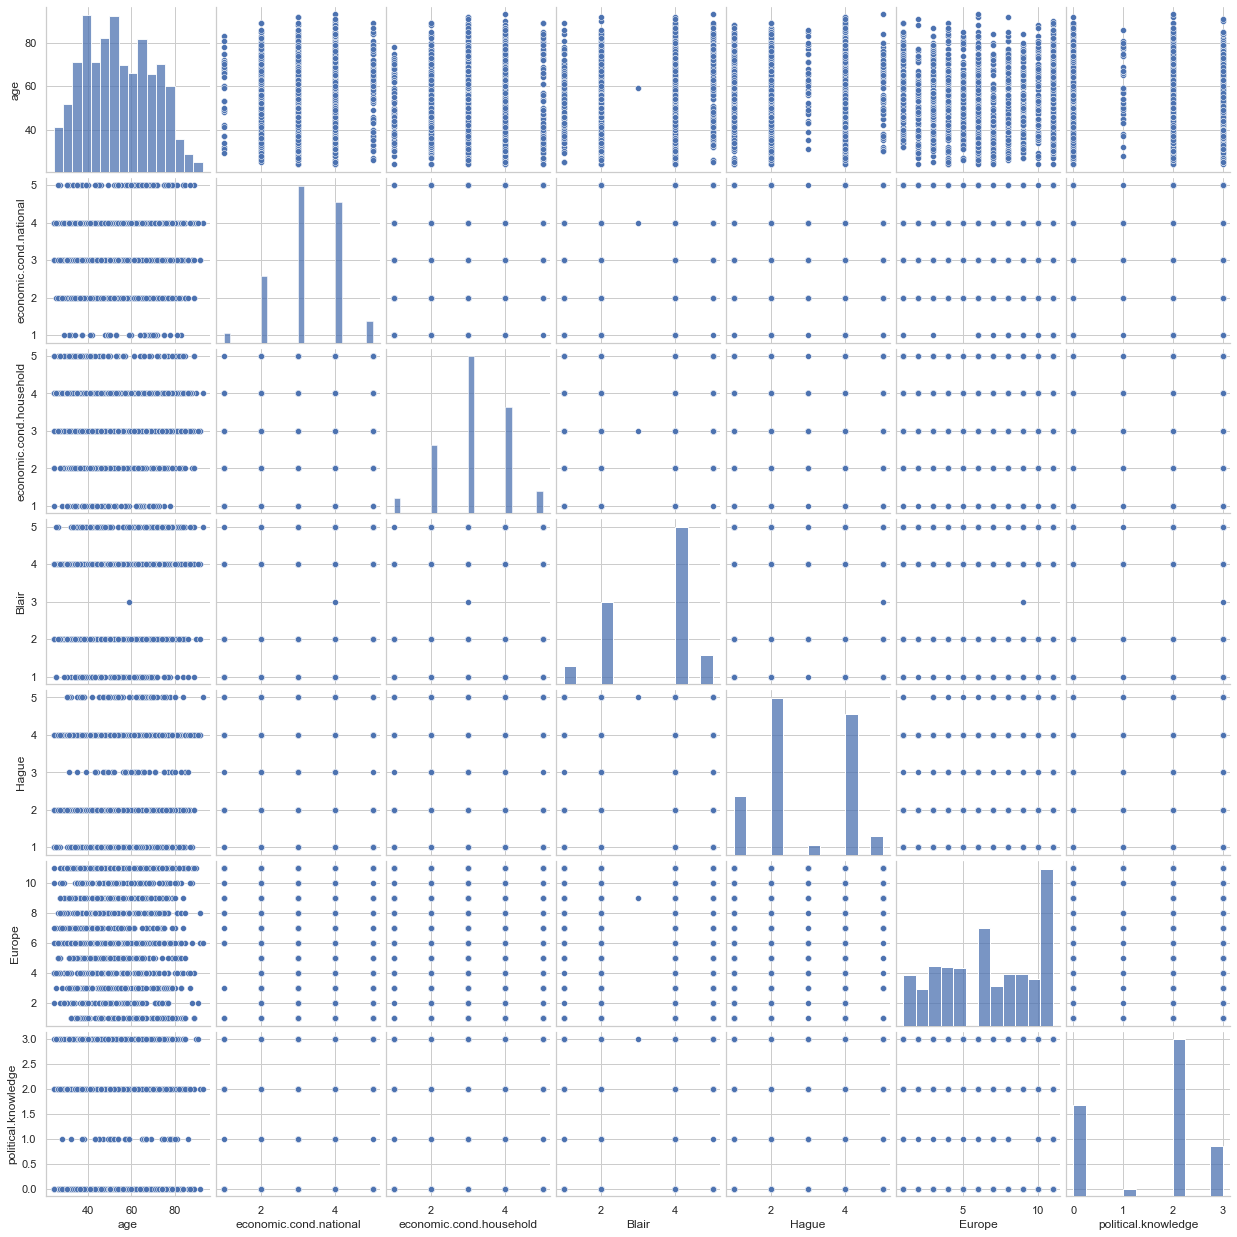

In [61]:
sns.pairplot(df)
plt.show()

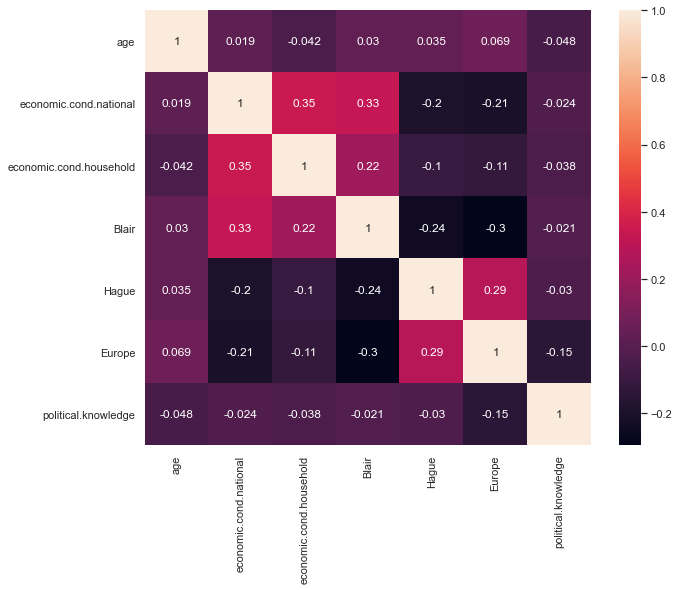

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [64]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

In [65]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

<AxesSubplot:>

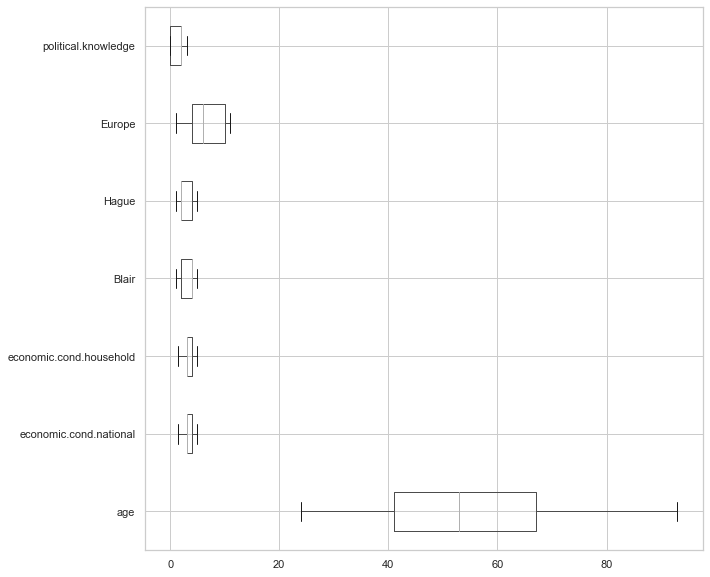

In [66]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

# Data Encoding

In [67]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes 

In [68]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1
2,1,35,4.0,4.0,5,2,3,2,1
3,1,24,4.0,2.0,2,1,4,0,0
4,1,41,2.0,2.0,1,1,6,2,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   int8   
 1   age                      1525 non-null   int64  
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   int64  
 5   Hague                    1525 non-null   int64  
 6   Europe                   1525 non-null   int64  
 7   political.knowledge      1525 non-null   int64  
 8   gender                   1525 non-null   int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 86.5 KB


In [70]:
df["vote"].value_counts()
#Labour : 1
#Conservative: 0

1    1063
0     462
Name: vote, dtype: int64

In [71]:
df["gender"].value_counts()
#Females: 0
#Males: 1

0    812
1    713
Name: gender, dtype: int64

In [72]:
df.shape

(1525, 9)

# Data Scaling

In [73]:
df_scaled = df.apply(zscore)

In [364]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,-5.288302e-16,1.000328,-1.516861,-1.516861,0.659256,0.659256,0.659256
age,1525.0,1.260922e-16,1.000328,-1.921698,-0.839313,-0.075276,0.816100,2.471512
economic.cond.national,1525.0,3.634251e-16,1.000328,-2.061826,-0.302622,-0.302622,0.870182,2.042985
economic.cond.household,1525.0,-4.266168e-17,1.000328,-1.877568,-0.182644,-0.182644,0.947305,2.077254
Blair,1525.0,4.322954e-16,1.000328,-1.987695,-1.136225,0.566716,0.566716,1.418187
Hague,1525.0,-1.560864e-16,1.000328,-1.419886,-0.607076,-0.607076,1.018544,1.831354
Europe,1525.0,-3.619691e-16,1.000328,-1.737782,-0.827714,-0.221002,0.992422,1.295778
political.knowledge,1525.0,-6.921968e-16,1.000328,-1.424148,-1.424148,0.422643,0.422643,1.346038
gender,1525.0,-1.948896e-16,1.000328,-0.937059,-0.937059,-0.937059,1.067169,1.067169


# Splitting the Data

In [166]:
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [167]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]] = X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]].apply(zscore)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [72]:
X_train.shape

(1067, 8)

In [87]:
y_train.value_counts(1)

1    0.688847
0    0.311153
Name: vote, dtype: float64

In [88]:
y_test.value_counts(1)

1    0.716157
0    0.283843
Name: vote, dtype: float64

# Logistic Regression Model

In [136]:
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [137]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]] = X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]].apply(zscore)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [139]:
lr = LogisticRegression()
LogR= lr.fit(X_train, y_train)

In [140]:
y_train_predict = lr.predict(X_train)
lr_score_train =lr.score(X_train, y_train)
print("Model Accuracy:",lr_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

Model Accuracy: 0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Model Accuracy: 0.8209606986899564
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

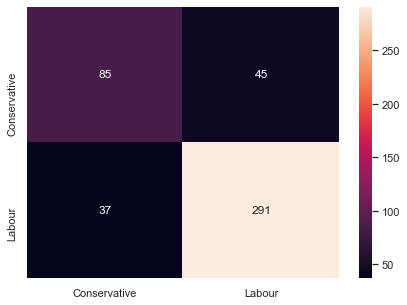

In [141]:
y_predict = lr.predict(X_test)
lr_score_test = lr.score(X_test , y_test) 

print("Model Accuracy:", lr_score_test)

print(metrics.classification_report(y_test, y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Grid Search ON LogR

In [142]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001,0.01,0.001]}

In [143]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.01, 0.001]},
             scoring='f1')

In [144]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.01} 

LogisticRegression(solver='sag', tol=0.01)


In [145]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [146]:
## Confusion matrix on the training data
lr_best_score_train = best_model.score(X_train, y_train)
print("Model Accuracy:", lr_best_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, ytrain_predict),'\n');

Model Accuracy: 0.8397375820056232
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



Model Accuracy: 0.8209606986899564
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

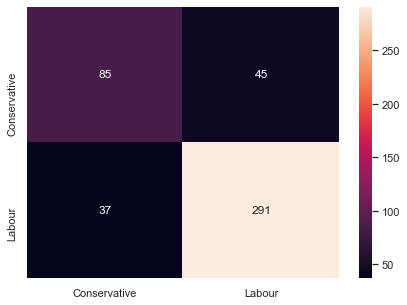

In [147]:
lr_best_score_test = best_model.score(X_test , y_test)
print("Model Accuracy:", lr_best_score_test)

print(metrics.classification_report(y_test, y_predict))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# LDA

In [148]:
clf = LinearDiscriminantAnalysis()
lda =clf.fit(X_train,y_train)

In [149]:
y_train_predict = lda.predict(X_train)
lda_score_train =lda.score(X_train, y_train)
print(lda_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



0.8187772925764192
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

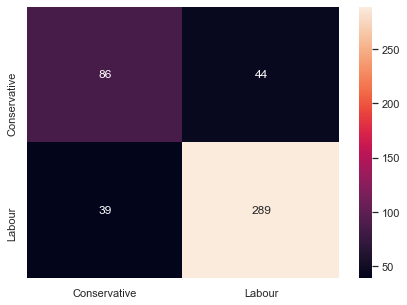

In [150]:
y_predict = lda.predict(X_test)

lda_score_test = lda.score(X_test , y_test)
print(lda_score_test)
print(metrics.classification_report(y_test, y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Grid Search On LDA

In [151]:
grid={
      'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001, 0.01]}

In [152]:

model = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs= None ,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05, 0.01]},
             scoring='f1')

In [153]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [154]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [155]:
lda_best_score_train = best_model.score(X_train, y_train)
print(lda_best_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, ytrain_predict),'\n');

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



0.8397375820056232
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

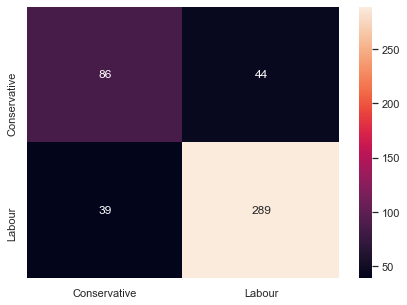

In [156]:
lda_best_score_test = best_model.score(X_train, y_train)
print(lda_best_score_test)

print(metrics.classification_report(y_test, y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [157]:

data = {'Train Set Score': [lr_score_train,lda_score_train] ,'Test Set Score': [lr_score_test,lda_score_test]}
print(pd.DataFrame(data,index=['Log R','LDA']))

       Train Set Score  Test Set Score
Log R         0.840675        0.820961
LDA           0.839738        0.818777


In [158]:
data = {'Best Score on Train Set': [lr_best_score_train,lda_best_score_train] ,'Best Score on Test Set': [lr_best_score_test,lda_best_score_test]}
print(pd.DataFrame(data,index=['Log R','LDA']))

       Best Score on Train Set  Best Score on Test Set
Log R                 0.839738                0.820961
LDA                   0.839738                0.839738


# KNN

In [80]:
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [81]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]] = X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]].apply(zscore)

In [83]:
KNN_model=KNeighborsClassifier()
KNN = KNN_model.fit(X_train,y_train)

In [84]:
y_train_predict = KNN.predict(X_train)
KNN_train_score = KNN.score(X_train, y_train)
print(KNN_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8641049671977507
[[249  83]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



0.8187772925764192
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

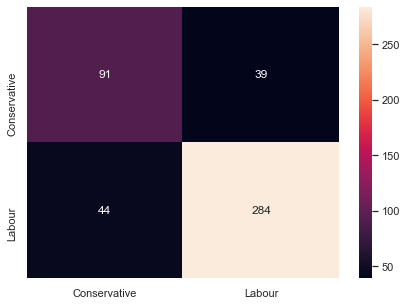

In [85]:
y_predict = KNN.predict(X_test)

KNN_test_score = KNN.score(X_test , y_test)
print(KNN.score(X_test , y_test))

print(metrics.classification_report(y_test, y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Grid Search on KNN

In [86]:

grid={
      'weights': ['uniform'],
      'n_neighbors': [1,3,5,7,9,11,13,15,17,19],
       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
       'leaf_size': [30,60,100,150,200,300]
     }

In [89]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring= None)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 60, 100, 150, 200, 300],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform']})

In [90]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 11, 'weights': 'uniform'} 

KNeighborsClassifier(n_neighbors=11)


In [91]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [92]:
KNN_best_train = best_model.score(X_train, y_train)
print(KNN_best_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, ytrain_predict),'\n');

0.8406747891283973
[[249  83]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



0.8165938864628821
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

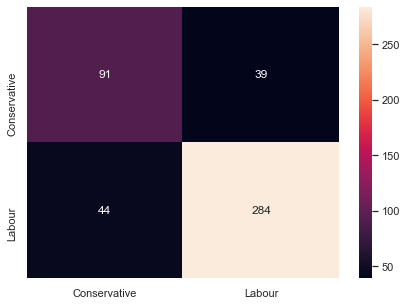

In [93]:
KNN_best_test = best_model.score(X_test , y_test)
print(KNN_best_test)
print(classification_report(y_test, y_predict))
      
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [94]:
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22707423580786024,
 0.1899563318777293,
 0.18122270742358082,
 0.17903930131004364,
 0.1834061135371179,
 0.1834061135371179,
 0.17685589519650657,
 0.17903930131004364,
 0.16593886462882101,
 0.17030567685589515]

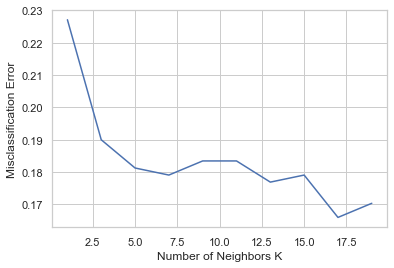

In [95]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# NB

In [121]:
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [123]:
NB_model = GaussianNB()
NB = NB_model.fit(X_train, y_train)

In [124]:
NB_model

GaussianNB()

In [125]:
NB_model.epsilon_

2.495564471856997e-07

In [126]:
y_train_predict = NB.predict(X_train)
NB_score_train =NB.score(X_train, y_train)
print(NB_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



0.8231441048034934
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



<AxesSubplot:>

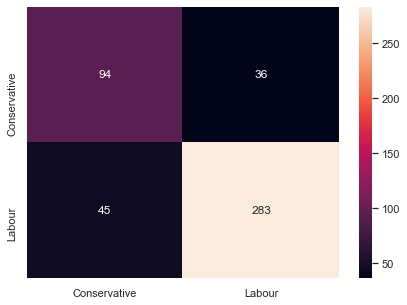

In [127]:
y_predict = NB.predict(X_test)
NB_score_test = NB.score(X_test , y_test)

print(NB_score_test)

print(metrics.classification_report(y_test, y_predict))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Grid Search On NB

In [159]:
param_grid_nb ={
      'priors': [None], 
      'var_smoothing': [1e-09,0,2.495564471856997e-07]
     }

In [160]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring= 'accuracy')
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_params_,'\n')
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'priors': None, 'var_smoothing': 1e-09} 

GaussianNB()


In [161]:
NB_best_train = best_model.score(X_train, y_train)
print(NB_best_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, ytrain_predict),'\n');

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



0.8187772925764192
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



<AxesSubplot:>

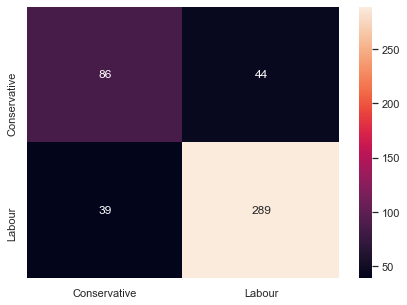

In [162]:
NB_best_test = best_model.score(X_test , y_test)
print(NB_best_test)
print(classification_report(y_test, y_predict),'\n');
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [164]:
data = {'Train Set Score': [KNN_train_score,NB_score_train] ,'Test Set Score': [KNN_test_score,NB_score_test]}
print(pd.DataFrame(data,index=['KNN','NB']))

     Train Set Score  Test Set Score
KNN         0.864105        0.818777
NB          0.832240        0.823144


In [165]:
data = {'Best Score on Train Set': [KNN_best_train,NB_best_train] ,'Best Score on Test Set': [KNN_best_test,NB_best_test]}
print(pd.DataFrame(data,index=['KNN','NB']))

     Best Score on Train Set  Best Score on Test Set
KNN                 0.840675                0.816594
NB                  0.839738                0.818777


# Bagging

In [169]:
Bagging = BaggingClassifier(random_state=1)

bgcl = Bagging.fit(X_train, y_train)

In [170]:
y_train_predict = bgcl.predict(X_train)
bag_score_train =bgcl.score(X_train, y_train)
print(bag_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9812558575445174
[[326   6]
 [ 14 721]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       332
           1       0.99      0.98      0.99       735

    accuracy                           0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067



0.8187772925764192
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

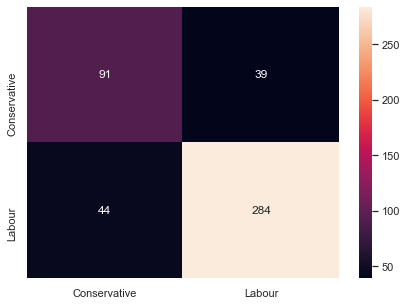

In [171]:
y_predict = bgcl.predict(X_test)
bag_score_test = bgcl.score(X_test , y_test)
print(bgcl.score(X_test , y_test))

print(metrics.classification_report(y_test, y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Boosting

# Ada Boost

In [172]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(random_state=1)
abcl = AdaBoost.fit(X_train, y_train)

In [173]:
y_train_predict = abcl.predict(X_train)
ada_score_train =abcl.score(X_train, y_train)
print(ada_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8425492033739457
[[236  96]
 [ 72 663]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



0.8231441048034934
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<AxesSubplot:>

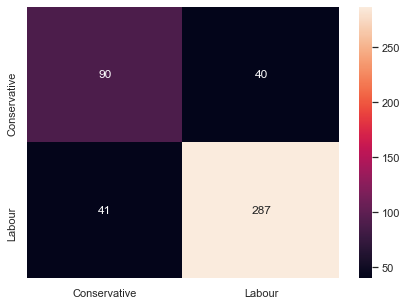

In [174]:
y_predict = abcl.predict(X_test)
ada_score_test = abcl.score(X_test , y_test) 
print(abcl.score(X_test , y_test))

print(metrics.classification_report(y_test, y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Gradient Boost

In [180]:
GradientBoost = GradientBoostingClassifier(random_state=1)
gbcl = GradientBoost.fit(X_train, y_train)

In [181]:
y_train_predict = gbcl.predict(X_train)
gradient_score_train =gbcl.score(X_train, y_train)
print(gradient_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



0.8318777292576419
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

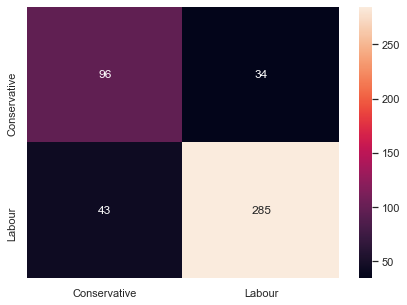

In [182]:
y_predict = gbcl.predict(X_test)
gradient_score_test = gbcl.score(X_test, y_test)
print(gradient_score_test)

print(metrics.classification_report(y_test, y_predict))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ["Conservative","Labour"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [191]:
pd.DataFrame(y_predict).value_counts(normalize = True)

1    0.696507
0    0.303493
dtype: float64

In [183]:
data = {'Train Set Score': [bag_score_train,ada_score_train,gradient_score_train] ,'Test Set Score': [bag_score_test,ada_score_test,gradient_score_test]}
print(pd.DataFrame(data,index=['Bagging','Ada Boost','Gradient Boost']))

                Train Set Score  Test Set Score
Bagging                0.981256        0.818777
Ada Boost              0.842549        0.823144
Gradient Boost         0.886598        0.831878


# Model Comparisson 

In [273]:
models=[LogR,lda, KNN,NB,bgcl,abcl]
models_names={LogR:'Logistic Regression',lda:'LDA', KNN_model: 'KNN', NB_model: 'NB', Bagging: 'bgcl', AdaBoost: 'abcl', GradientBoost: 'gbcl'}

In [ ]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy on Train Set for {} model is'.format(models_names[i]),'\n',accuracy_score(y_train,i.predict(X_train)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_train,i.predict(X_train)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_train,i.predict(X_train)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

In [ ]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy on Test Set for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# ROC AUC

In [179]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(y_test,LogR.predict_proba(X_test)[:,1]))
print('Area under the curve for LDA Model is',roc_auc_score(y_test,lda.predict_proba(X_test)[:,1]))
print('Area under the curve for KNN Model is',roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))
print('Area under the curve for NB Model is',roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1]))
print('Area under the curve for NB Model is',roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Bagging Model is',roc_auc_score(y_test,bgcl.predict_proba(X_test)[:,1]))
print('Area under the curve for AdaBoosting Model is',roc_auc_score(y_test,abcl.predict_proba(X_test)[:,1]))
print('Area under the curve for Gradient Boosting Model is',roc_auc_score(y_test,gbcl.predict_proba(X_test)[:,1]))

Area under the curve for Logistic Regression Model is 0.8833489681050657
Area under the curve for LDA Model is 0.8841932457786117
Area under the curve for KNN Model is 0.8686913696060037
Area under the curve for NB Model is 0.875375234521576
Area under the curve for NB Model is 0.875375234521576
Area under the curve for Bagging Model is 0.8661819887429644
Area under the curve for AdaBoosting Model is 0.8801946529080675
Area under the curve for Gradient Boosting Model is 0.9043386491557224


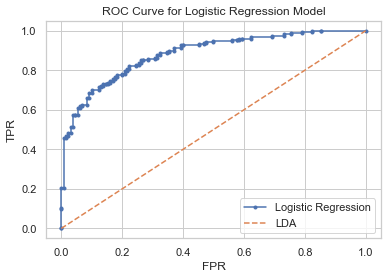

In [285]:
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, LogR.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

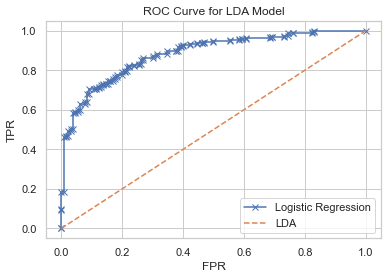

In [276]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='x') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('LDA Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

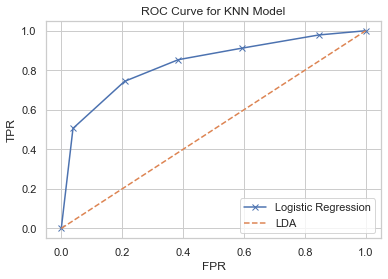

In [280]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='x') 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('KNN Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

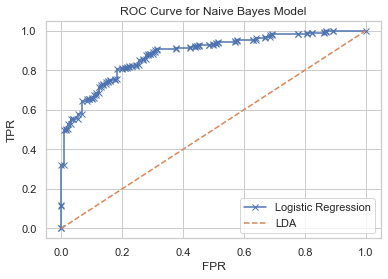

In [281]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='x') 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Naive Bayes Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

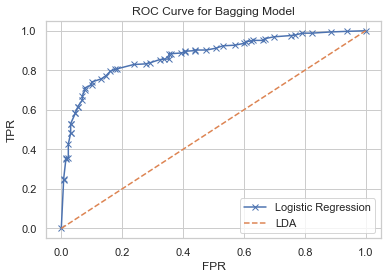

In [282]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, bgcl.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='x') 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Bagging Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

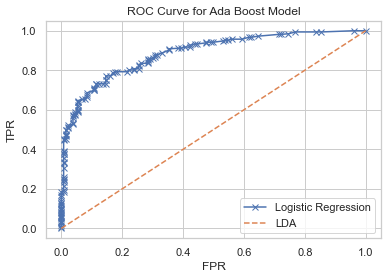

In [283]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, abcl.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='x') 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Ada Boost Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

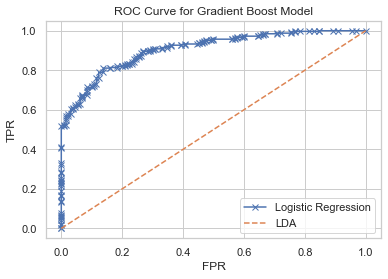

In [284]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, gbcl.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='x') 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Gradient Boost Model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

# Problem #2

In [2]:
from nltk.corpus import inaugural

In [4]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

# Count of words

In [5]:
print("The number of words in the Roosevelt Speech: ",len(inaugural.words("1941-Roosevelt.txt")))
print("The number of words in the Kennedy Speech: ",len(inaugural.words("1961-Kennedy.txt")))
print("The number of words in the Nixon Speech: ",len(inaugural.words("1973-Nixon.txt")))

The number of words in the Roosevelt Speech:  1536
The number of words in the Kennedy Speech:  1546
The number of words in the Nixon Speech:  2028


# Count of sentences

In [6]:
print("The number of sentences in the Roosevelt Speech: ",len(inaugural.sents("1941-Roosevelt.txt")))
print("The number of sentences in the Kennedy Speech: ",len(inaugural.sents("1961-Kennedy.txt")))
print("The number of sentences in the Nixon Speech: ",len(inaugural.sents("1973-Nixon.txt")))

The number of sentences in the Roosevelt Speech:  68
The number of sentences in the Kennedy Speech:  52
The number of sentences in the Nixon Speech:  69


# Count of Characters

In [7]:
print("The number of characters in the Roosevelt Speech: ",len(inaugural.raw("1941-Roosevelt.txt")))
print("The number of characters in the Kennedy Speech: ",len(inaugural.raw("1961-Kennedy.txt")))
print("The number of characters in the Nixon Speech: ",len(inaugural.raw("1973-Nixon.txt")))

The number of characters in the Roosevelt Speech:  7571
The number of characters in the Kennedy Speech:  7618
The number of characters in the Nixon Speech:  9991


# Stopwords Removal

In [8]:
roosevelt = inaugural.raw("1941-Roosevelt.txt")
kennedy = inaugural.raw("1961-Kennedy.txt")
nixon = inaugural.raw("1973-Nixon.txt")

In [10]:
import re
import string

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stemmer = SnowballStemmer("english")


def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    #ret_tokens = [stemmer.stem(t) for t in tokens]
    return tokens



In [11]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
tokens_roose = myTokenizer(roosevelt)
tokens_ken = myTokenizer(kennedy)
tokens_nix = myTokenizer(nixon)

# Word Frequency

In [13]:
all_words = (x.lower() for x in tokens_roose)
all_words_clean = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(10)]
print("The most top 3 most frequently used words in Roosevelt's speech are :", word_features)

The most top 3 most frequently used words in Roosevelt's speech are : ['nation', 'know', 'spirit', 'life', 'democracy', 'us', 'people', 'america', 'years', 'freedom']


In [76]:
 # nation(12), know:(10), spirit(9)

In [14]:
all_words = (x.lower() for x in tokens_ken)
all_words_clean = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(10)]
print("The most top 3 most frequently used words in Kennedy's speech are :", word_features)

The most top 3 most frequently used words in Kennedy's speech are : ['let', 'us', 'world', 'sides', 'new', 'pledge', 'citizens', 'power', 'shall', 'free']


In [15]:
all_words = (x.lower() for x in tokens_nix)
all_words_clean = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(10)]
print("The most top 3 most frequently used words in Nixon's speech are :", word_features)

The most top 3 most frequently used words in Nixon's speech are : ['us', 'let', 'america', 'peace', 'world', 'new', "'s", 'nation', 'responsibility', 'government']


# Removing Common Words

In [21]:
stopwords.extend(["us", "let","know"])

In [26]:
all_words = (x.lower() for x in tokens_roose)
all_words_clean_roosevelt = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(3)]
print("The most top 3 most frequently used words in Roosevelt's speech are :", word_features)

The most top 3 most frequently used words in Roosevelt's speech are : ['america', 'peace', 'world']


In [36]:
all_words = (x.lower() for x in tokens_ken)
all_words_clean_Kennedy = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(3)]
print("The most top 3 most frequently used words in Kennedy's speech are :", word_features)

The most top 3 most frequently used words in Kennedy's speech are : ['america', 'peace', 'world']


In [37]:
all_words = (x.lower() for x in tokens_nix)
all_words_clean_Nixon = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features = [item[0] for item in all_words_freq.most_common(3)]
print("The most top 3 most frequently used words in Nixon's speech are :", word_features)

The most top 3 most frequently used words in Nixon's speech are : ['america', 'peace', 'world']


# Word Cloud

In [39]:
corpus_Roosevelt = all_words_clean_roosevelt 
corpus_Kennedy = all_words_clean_Kennedy
corpus_Nixon = all_words_clean_Nixon

In [40]:
wc_a = ' '.join(corpus_Roosevelt)
wc_b = ' '.join(corpus_Kennedy)
wc_c = ' '.join(corpus_Nixon)


In [34]:
!pip install wordcloud

Word Cloud for Roosevelt's Speech!!


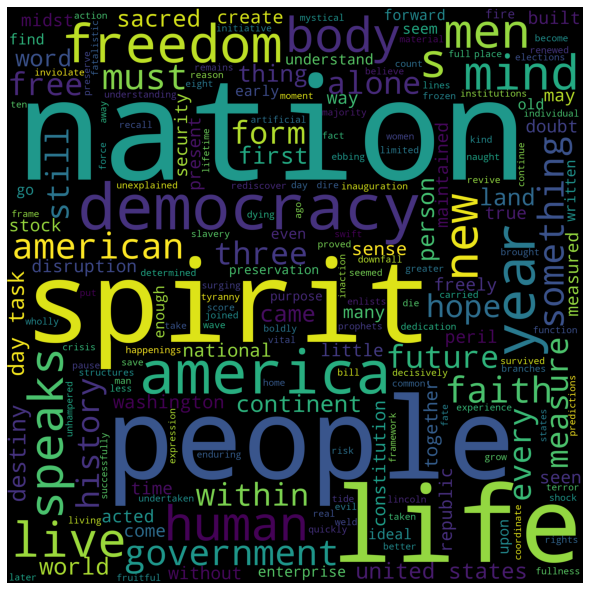

In [193]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt's Speech!!")
plt.show()


Word Cloud for Kennedy's Speech!!


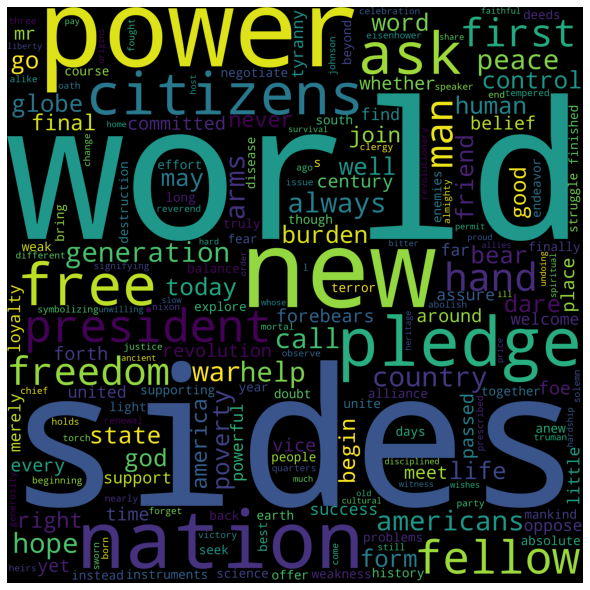

In [41]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy's Speech!!")
plt.show()


Word Cloud for Nixon's Speech!!


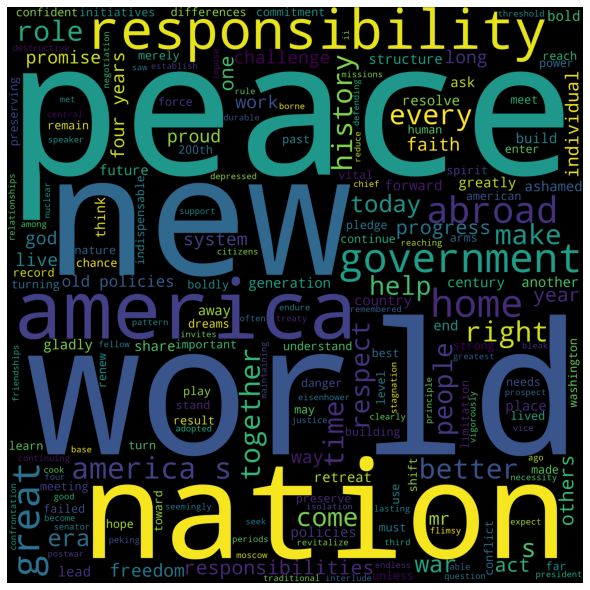

In [42]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon's Speech!!")
plt.show()
